###### author : Amine KHELDOUNI

# Descente de gradient, classifieur linéaires

In [144]:
# Importation des modules

import  numpy as np
import matplotlib.pyplot as plt
from tools import *
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3


## Données et classifieur bayésien naïf

In [145]:
# Corps d'une classe de classifieur
def Classifier(object):
    def __init__(self):
        pass
    def predict(self,data):
        pass
    def fit(self,data,labels):
        pass
    def score(self,data,labels):
        return (self.predict(data)==labels).mean()

def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    """ l : liste des chiffres a extraire"""
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    idx = np.random.permutation(range(len(tmpy)))
    return tmpx[idx,:],tmpy[idx]

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")


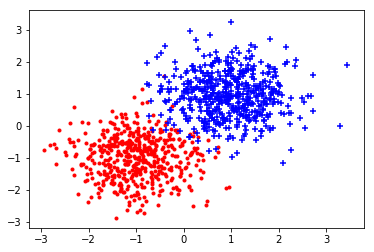

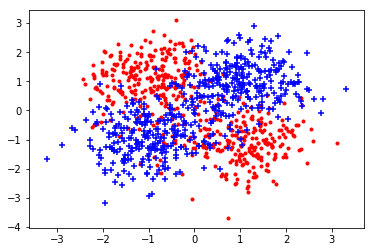

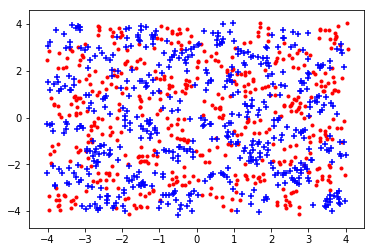

In [146]:
### Donnees artificielles
plt.ion()
for i in range(3):
    xgentrain,ygentrain = gen_arti(data_type=i,sigma=0.5,nbex=1000,epsilon=0.1)
    xgentest,ygentest = gen_arti(data_type=i,sigma=0.5,nbex=1000,epsilon=0.1)
    plt.figure()
    plot_data(xgentrain,ygentrain)
    plt.show()


Les données artificielles sont générées aléatoirement grace à 3 types de jeux de données. Ces jeux de données sont caractérisés par des nuages de points (bleus et rouges). Pour la jeu de données 0 ($data\_type = 0$), on remarque que les nuages de points de différentes couleurs sont bien séparables alors que pour les autres il est plus difficile de les différentier.
On s'intéressera dans la suite de notre étude à classifier les données selon certains critères que l'on détaillera prochainement dans le rapport.

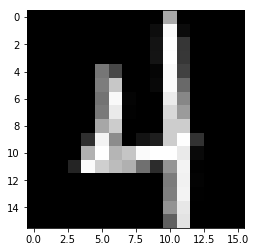

In [147]:
# Données reelles
plt.figure()
xuspstrain,yuspstrain = load_usps("USPS_train.txt")
xuspstest,yuspstest = load_usps("USPS_test.txt")
xtrain,ytrain = get_usps([1, 7, 4, 5],xuspstrain,yuspstrain)
xtest,ytest = get_usps([1],xuspstest,yuspstest)
show_usps(xtrain[0])
plt.show()


En effectuant quelques manipulation et tracés des fonctions fournies en annexe, on remarque que les données USPS sont des données très grandes, plusieurs lignes de 256 éléments, caractérisant une image d'un nombre entre 0 et 9.
Notre but ultime sera de classifier les nombre et donc de faire de l'apprentissage sur les données d'entraînement USPS puis de tester sur un certain label (un certain nombre) si la prédiction du numéro inscrit est bonne ou pas.

Le problème de classification le plus facile serait de classifier entre un chiffre et tous les autres plutôt que classifier chaque deux chiffres entre eux. De plus, la classification entre deux chiffres seulement sera plus difficile que si on les confrontait à plusieurs chiffres.

Par exemple, les paires de chiffres pouvant poser problème lors de la classification au vu de la faible différence de pixels sont $(6, 0)$, $(1, 9)$, $(6, 9)$, $(1, 7)$, $(2, 1)$ ...

### Question 1.3

Les valeurs de probabilité estimées à 0 sont remplacées par une valeur très faible mais non nulle pour éviter les problèmes de calcul dans la log-vraisemblance (logarithme de 0 ...) et pour éviter également que le produit avec un élément nul fausse le résultat car cet élément pondérera directement le calcul de la vraisemblance à 0. On lui donne donc une densité extrêmement faible mais non nulle pour pouvoir retrouver le maximum de vraisemblance et effectuer la classification bayésienne.


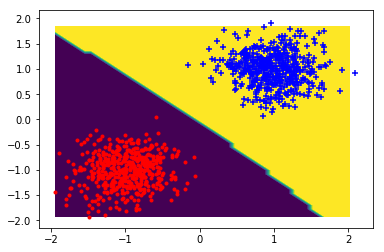

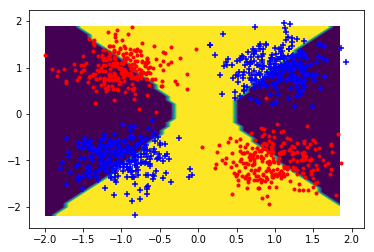

In [148]:
class Bayes(object):
    """ Classe de classifieur Bayésien """
    
    def fit(self, datax, datay):
        n, d = datax.shape
        self.labels = list(set(datay))
        self.mu = dict()
        self.std = dict()
        self.apriori = dict()
        for l in self.labels:
            self.mu[l] = datax[datay==l].mean(0) + 1e-10
            self.std[l] = datax[datay==l].std(0) + 1e-10
            self.apriori[l] = (datay==l).mean()
            
    def predict(self, datax):
        res = []
        for l in self.labels:
            res.append(np.sum(-np.log(np.exp(-((datax-self.mu[l])**2)/\
                                             (2*self.std[l]**2))/\
                                      np.sqrt(2*np.pi*self.std[l])), 1))
        res = np.array(res)
        return np.array([self.labels[i] for i in np.argmin(res, 0)])
    
    def score(self, data, labels):
        return (self.predict(data)==labels).mean()
    
B = Bayes()

# Tracé pour les jeux de données artificiels 0 et 1
for i in range(2):
    xgentrain,ygentrain = gen_arti(data_type=i,sigma=0.1,nbex=1000,epsilon=0.1)
    xgentest,ygentest = gen_arti(data_type=i,sigma=0.1,nbex=1000,epsilon=0.1)
    B.fit(xgentrain, ygentrain)
    plot_frontiere(xgentest, B.predict, step=50)

    plot_data(xgentest,ygentest)
    plt.show()

On remarque tout d'abord que pour un jeu de donnée artificiel dont les nuages de points sont séparés, on arrive à bien classifier les données par notre classifieur bayésien naïf. En effet, la frontière de prédiction forme une ligne presque droite dans l'ensemble et classe bien les nuages bleu et rouge.
Néanmoins, pour le second jeu de données, il est difficile d'effectuer une classification bayésienne naïve, car le nombre de dimension de la classification tombe en défaut et ne peux pas séparer les points étant répandus sur la carte de classification.

Chiffre que l'on voudrait retrouver après l'apprentissage : 


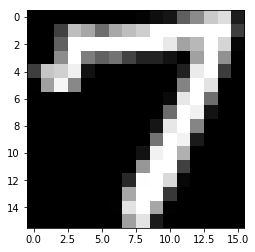

Liste des prédictions :
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 1 7 7 7 7 7
 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 1 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Score :
0.972789115646


/home/amine/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log


In [149]:
# Données réelles :

xtrain,ytrain = get_usps([1, 7],xuspstrain,yuspstrain)
xtest,ytest = get_usps([7],xuspstest,yuspstest)
B.fit(xtrain, ytrain)
print("Chiffre que l'on voudrait retrouver après l'apprentissage : ")
show_usps(xtest[0])
plt.show()

print('Liste des prédictions :')
print(B.predict(xtest))

print('Score :')
print(B.score(xtest, 7))

On remarque donc que la fonction de prédiction fourni une liste d'occurrence selon les données fournies. Et cette prédiction aboutit à une occurrence très importante du chiffre $7$ qui est justement le chiffre sur lequel on a testé notre classifieur bayésien. Le score du chiffre $7$ étant nettement supérieur à celui de $1$ : $97,3 \%$

Chiffre que l'on voudrait retrouver après l'apprentissage : 


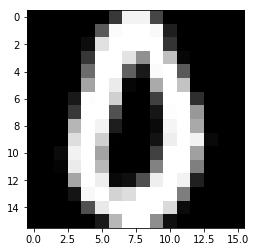

Score :
0.963788300836
Chiffre que l'on voudrait retrouver après l'apprentissage : 


/home/amine/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log


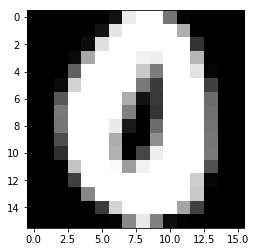

Score :
0.838440111421


In [150]:

xtrain,ytrain = get_usps([0, 6],xuspstrain,yuspstrain)
xtest,ytest = get_usps([0],xuspstest,yuspstest)
B.fit(xtrain, ytrain)
print("Chiffre que l'on voudrait retrouver après l'apprentissage : ")
show_usps(xtest[0])
plt.show()
print('Score :')
print(B.score(xtest, 0))


xtrain,ytrain = get_usps([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],xuspstrain,yuspstrain)
xtest,ytest = get_usps([0],xuspstest,yuspstest)
B.fit(xtrain, ytrain)
print("Chiffre que l'on voudrait retrouver après l'apprentissage : ")
show_usps(xtest[0])
plt.show()
print('Score :')
print(B.score(xtest, 0))

En confrontant cette fois ci $0$ et $6$, on remarque que $0$ obtient un score de $96 \%$ lors d'une classification bayésienne binaire. Alors que en effectuant l'apprentissage sur tous les chiffres et donc les $10$ labels, on rentrouve un score de $0$ de $84\%$, ce qui confirme que la confrontation binaire entre deux chiffres est plus efficace que de confronter l'un face à toute la liste de labels.

# 2. Descente de gradient

In [151]:
def optimize(fonc, dfonc, xinit, eps, max_iter):
    x_histo = [xinit]
    f_histo = [fonc(xinit)]
    grad_histo = [dfonc(xinit)]
    k = 0
    while k < max_iter:
        xp = x_histo[k] - eps * grad_histo[k]
        x_histo.append(xp)
        f_histo.append(fonc(xp))
        grad_histo.append(dfonc(xp))
        k += 1
    return (np.array(x_histo), np.array(f_histo), np.array(grad_histo))

In [152]:
# En 1d :
def f(x):
    return x * np.cos(x)

def df(x):
    return np.cos(x) - x * np.sin(x)


Après implémentation de la descente de gradient, nous avons testé sur une dimension la fonction $ f(x) = x cos(x) $. 

On obtient avec un pas de $\epsilon = 0.01$ et sur $1000$ itérations, une convergence de l'ordre de $10^{-9}$ du gradient avec un $x_{opt} = -0.86$ et une valeur optimale de $f(x_{opt}) = -0.56$


In [153]:
# En 2d :

def g(x):
    return 100 * (x[1]-x[0]**2)**2 + (1-x[0])**2

def dg(x):
    return np.array([400*x[0]**3 + (2-400*x[1])*x[0] - 2, 200 * (x[1] - x[0]**2)])


En généralisant la descente de gradient à plusieurs dimensions, on tourne l'algorithme d'optimisation pour la fonction Rosenbrock définie ci-dessus, et on obtient pour un grand nombre d'itération une convergence de l'ordre de $10^{-6}$ du gradient pour un x optimal de : $x_{opt} = ( 0.999, 0.999 ) $ et une valeur quasiment nulle.

In [154]:
# Tracés :

def graphics(s, fonc):
    if s=='1D':
        a,b,c = optimize(f, df, 0.01, 0.01, 800)
    if s=='2D':
        a,b,c = optimize(g, dg, np.array([0.7, 0.2]), 0.000001, 10000)
        
    x = np.linspace(1, len(a), len(a))
    norm_grad = [np.linalg.norm(v) for v in c]
    plt.figure(figsize=(5,5))
    plt.plot(x, b, color='blue')
    plt.xlabel("nombre d'iterations")
    plt.ylabel('f')
    plt.title('Tracé de la valeur de la fonction par rapport aux'+\
              'itérations de la descente de gradient')
    plt.draw()
    plt.show()
    
    plt.figure(figsize=(5,5))
    plt.plot(x, norm_grad, color='green')
    plt.xlabel("nombre d'iterations")
    plt.ylabel('Norme du gradient')
    plt.title('Tracé de la norme du gradient par rapport aux'+\
              'itérations de la descente de gradient')
    plt.draw()
    plt.show()
    if s=='1D':
        plt.figure(figsize=(5,5))
        fonc_y = np.linspace(min(b), max(b), len(b))
        tmp_a = np.linspace(-1,1,100)
        plt.plot(tmp_a, [fonc(x) for x in tmp_a], color='red',\
                 label='value of f')
        plt.plot(a, b, color='green', label='value of f(x_t)',\
                 marker='*', markersize=2)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xlabel("x")
        plt.ylabel('f(x)')
        plt.title('Tracé de la valeur de la fonction et de son'+\
                  'approximation lors des itérations'\
                  +'de la descente de gradient')
        plt.draw()
        plt.show()
    if s=='2D':
        x1 = np.linspace(-1, 2, 1000)
        x2 = np.linspace(-1, 2, 1000)
        X, Y = p.meshgrid(x1, x2)
        Z = g([X,Y])
        fig=p.figure()
        ax = p3.Axes3D(fig)
        ax.plot_surface(X,Y,Z, color='red', label = 'surface de f')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        p.show()
        
    plt.figure(figsize=(5,5))
    err = []
    for i in range(len(a)-1):
        err.append(np.log(np.linalg.norm(a[-1]-a[i]))+1e-20)
    t = np.linspace(1, len(a)-1, len(a)-1)
    plt.plot(t, err, color = 'brown')
    plt.xlabel("nombre d'itérations")
    plt.ylabel("log de l'erreur sur une itération")
    plt.title("Tracé de l'erreur fil des itérations (convergence)")
    plt.draw()
    plt.show()

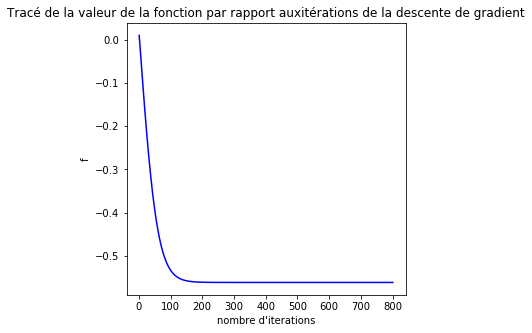

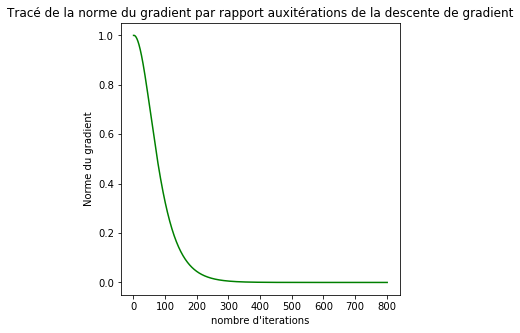

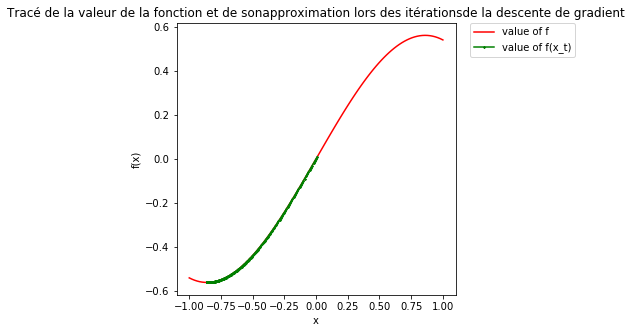

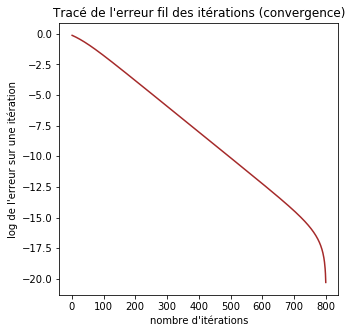

In [155]:
# Pour la fonction à une dimension :
graphics('1D', f)

Tout d'abord, on retrouve la convergence de la méthode de descente du gradient implémentée lors du tracé de $f$ et $\|\nabla f\|$ en fonction du nombre d'itérations. En effet, $f$ tend très vite vers sa valeur optimale et la norme du gradient converge bien vers $0$.
Enfin, le tracé de $f(x)$ et $f(x^t)$ montre que les pas d'itération (courbe verte) accompagne la fonction $f$ (courbe rouge) depuis $x_0$ le premier germe d'itération, vers la valeur optimale pris en $x_{opt} = -0.86$

On remarque également que le tracé de l'erreur en échelle logarithmique en fonction du nombre d'itérations tend très vite vers des valeurs négatives. Ce qui prouve que l'erreur converge bien vers $0$.



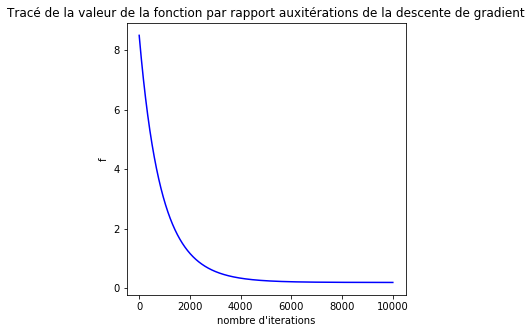

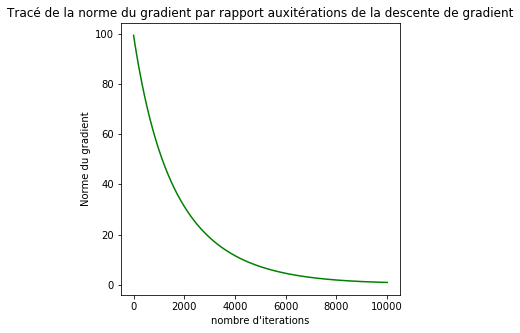

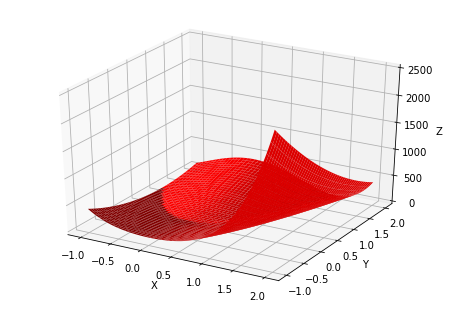

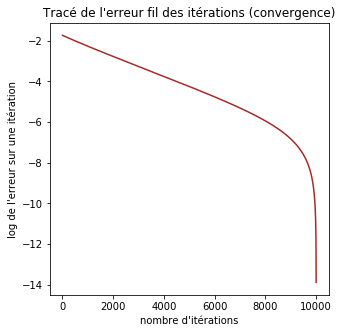

In [156]:
graphics('2D', g)

Pour la fonction de Rosenbrock, on effectue l'optimisation sur un plus grand nombre d'itérations $k_{maxIter} = 10000$ et pour un pas très petit pour assurer la convergence de la méthode $(\epsilon = 10^{-6})$
On retrouve alors les mêmes résultats qu'en dimension 1, à savoir une convergence de la fonction vers sa valeur optimale selon le nombre d'itérations, une convergence vers $0$ de la norme du gradient, et une erreur logarithmique très négative sur un nombre d'itérations suffisamment grand.

## 3. Applications : Classification plug-in et Régression logistique

#### Question 3.1

Pour le modèle de classification plug-in : 

On calcule le gradient de l'erreur des moindres carrés pour l'utiliser dans notre descente de gradient et trouver un vecteur $w$ d'apprentissage recueillit par les données d'entraînements.
Le calcul du gradient (donc des dérivées partielles) de la MSE se fait comme suit :

$$ \frac{\partial L}{\partial w_0} =  2 \sum_{i=1}^N (w_0 + \sum_j w_j x_j^i - y^i) $$
$$ \forall \; k \geq 1, \; \; \; \frac{\partial L}{\partial w_k} =  2 \sum_{i=1}^N x_k^i (w_0 + \sum_j w_j x_j^i - y^i) $$

Pour le modèle de classification par régression logistique : 

On utilise un maximum de vraisemblance pour trouver un paramètre $w$ optimal et correspondant le mieux aux données. Par suite, on cherche le gradient (donc les dérivées partielles en $w_k$) du coût à optimiser. En effet, minimiser la neg-log-vraisemblance revient à maximiser la vraisemblance en $w$.
Le calcul du gradient se fait donc comme suit :

$$\frac{\partial L}{\partial w_0} = - \sum_{i=1}^N \frac{-y^i e^{-y^i (w_0+\sum_{j=1}^d w_j x_j^i)}}{1+e^{-y^i (w_0+\sum_{j=1}^d w_j x_j^i)}}$$ 

Et :
$$ \forall \; k \geq 1, \; \; \; \frac{\partial L}{\partial w_k} = - \sum_{i=1}^N \frac{-y^i x_k^i e^{-y^i (w_0+\sum_{j=1}^d w_j x_j^i)}}{1+e^{-y^i (w_0+\sum_{j=1}^d w_j x_j^i)}}$$ 


Une fois les fonctions et les gradients respectifs implémentés, il suffira de dérouler l'algorithme de descente du gradient grace à la fonction $optimize$ pour obtenir un paramètre d'apprentissage $w$ optimal minimisant les moindres carrés pour la classification plug-in et la nég-log-vraisemblance pour la classification par régression logistique.


In [179]:
# Question 3.2

# Données artificielles :
xgentrain,ygentrain = gen_arti(data_type=0, sigma=0.1, nbex=1000, epsilon=0.1)
xgentest,ygentest = gen_arti(data_type=0, sigma=0.1, nbex=1000, epsilon=0.1)

# Données réelles : 
xtrain,ytrain = get_usps([1,7],xuspstrain,yuspstrain)
xtest,ytest = get_usps([7],xuspstest,yuspstest)

# Définition des données pour les classifieurs Plug-in et Régression logistique :
data = xgentrain
label = ygentrain

def mse(w, data=data, label=label):
    d = data.shape[0]
    U = np.ones((d,1))
    f = np.hstack((U, data))
    return np.sum((f.dot(w) - label).T.dot(f.dot(w) - label))/data.shape[0]

def grad_mse(w, data=data, label=label):
    dL = []
    d = data.shape[0]
    U = np.ones((d,1))
    f = np.hstack((U, data))
    dL.append(2* np.sum((f.dot(w) - label)))
    for k in range(1, len(w)):
        dL.append(2* np.sum(data[:, k-1].T.dot((f.dot(w) - label))))
    return np.array(dL)/data.shape[0]

def fw(w,data):
    # Produit scalaire (astuce de calcul)
    d = data.shape[0]
    U = np.ones((d,1))
    f = np.hstack((U, data))
    f_w = f.dot(w)
    return f_w

# Fonction de prédiction de la classification plug-in :

def predictMSE(datax):
        a, b, c = optimize(mse, grad_mse, np.array([0]+\
                                                   [1]*datax.shape[1]), 0.0001, 500)
        return np.sign(fw(a[-1], datax))

In [180]:
# Question 3.3

def reglog(w, data=data, label=label):
    f = fw(w,data)
    return - np.sum(np.log(1+np.exp(-label * f)))/data.shape[0]

def grad_reglog(w, data=data, label=label):
    f = fw(w,data)
    denom = 1 + np.exp(-label * f)
    num0 = -label * np.exp(-label * f)
    dL = [-np.sum(num0/denom)/data.shape[0]]
    for k in range(1, len(w)):
        numk = -label * data[:,k-1] *  np.exp(-label * f)
        dL.append(-np.sum(numk/denom)/data.shape[0])
    return np.array(dL)

# Predicteur pour la régression logistique :
def predictRegLog(datax):
        a, b, c = optimize(reglog, grad_reglog, \
                           np.array([0]+[1]*datax.shape[1]), 0.000000001, 500)
        wtrain = a[-1]
        return np.sign(1/(1+np.exp(-fw(wtrain,datax))) - 0.5)


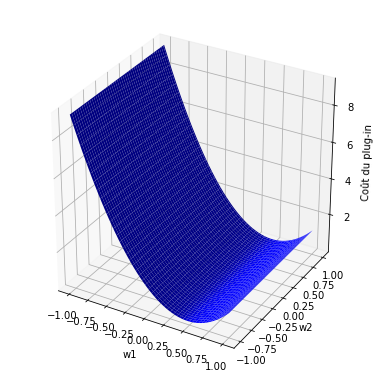

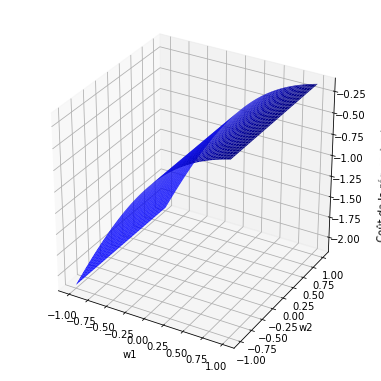

In [159]:
# Test sur les données artificielles
# Question 3.4

w1 = np.linspace(-1, 1, 100)
w2 = np.linspace(-1, 1, 100)
X, Y = p.meshgrid(w1, w2)
C1 = np.array([mse([0, w1[i], w2[i]]) for i in range(100)])
fig=p.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
ax.plot_surface(X,Y,C1, color='blue',\
                label = 'surface du coût des moindres carrés')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Coût du plug-in')
p.show()

C2 = np.array([reglog([0, w1[i], w2[i]]) for i in range(100)])
fig=p.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
ax.plot_surface(X,Y,C2, color='blue',\
                label = 'surface du coût des moindres carrés')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('\n \n \n Coût de la régression logistique')
p.show()

En traçant les coûts des deux classifieurs en fonction des deux coordonnées $w_1$ et $w_2$ du paramètre d'apprentissage $w$, on remarque que le coût du plug-in est convexe en $w_1$ alors que celui de la régression logistique est concave en ce paramètre et ce, en considérant un biais $w_0$ nul.

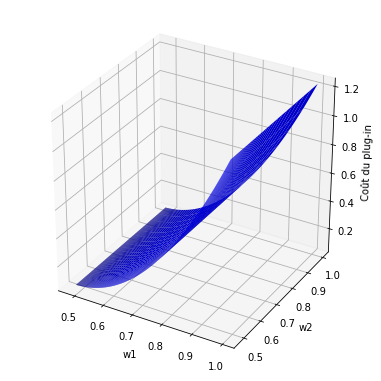

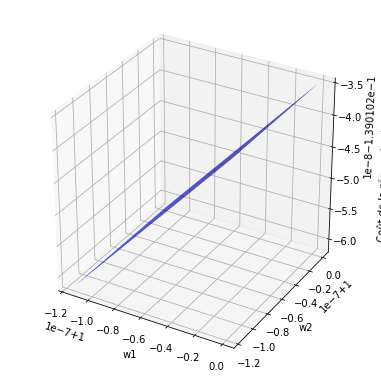

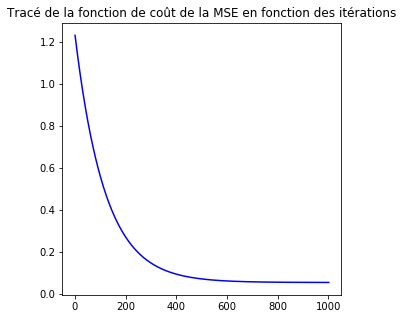

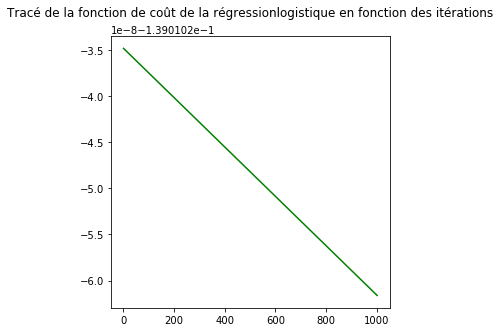

In [160]:
# Question 3.5

w_plug, fmse, grad_fmse = optimize(mse, grad_mse,\
                                   np.array([0]+[1]*data.shape[1]), 0.001, 1000)
w1 = np.array([w_plug[k][1] for k in range(len(w_plug))])
w2 = np.array([w_plug[k][2] for k in range(len(w_plug))])

X, Y = p.meshgrid(w1, w2)
C_plug = fmse
fig=p.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
ax.plot_surface(X,Y,C_plug, color='blue',\
                label = 'surface du coût des moindres carrés')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Coût du plug-in')
p.show()

w_rl, rl, grad_rl = optimize(reglog, grad_reglog,\
                             np.array([0]+[1]*data.shape[1]), 0.000000001, 1000)
w1 = np.array([w_rl[k][1] for k in range(len(w_rl))])
w2 = np.array([w_rl[k][2] for k in range(len(w_rl))])

X, Y = p.meshgrid(w1, w2)
C_rl = rl
fig=p.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
ax.plot_surface(X,Y,C_rl, color='blue',\
                label = 'surface du coût de la régression logistique')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('\n \n \n Coût de la régression logistique')
p.show()


# En fonction des itérations :
xx1 = np.linspace(1,len(fmse),len(fmse))
plt.figure(figsize=(5,5))
plt.plot(xx1, fmse, color = 'blue')
plt.title('Tracé de la fonction de coût de la MSE en fonction des itérations')
plt.show()
plt.figure(figsize=(5,5))
xx2 = np.linspace(1,len(rl),len(rl))
plt.title('Tracé de la fonction de coût de la régression'+\
          'logistique en fonction des itérations', y = 1.05)
plt.plot(xx2, rl, color = 'green')
plt.show()

On voit que la fonction de coût pour les moindres carrés converge bien vers 0 selon le nombre d'itérations.
Et la fonction nég-log-vraisemblance est décroissante linéairement selon le nombre d'itérations et reste assez faible négativement.

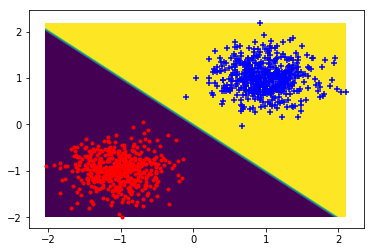

In [161]:
# Frontière pour les données artificielles :
plot_frontiere(xgentest, predictMSE, step=50)

plot_data(xgentest,ygentest)
plt.show()

Pour la classification plug-in, on utilise l'algorithme de descente de gradient pour trouver le minimum de l'erreur des moindres carrés annulant le gradient de notre fonction des moindres carrés. Ensuite, on trace la frontière par le prédicteur et on obtient une séparation correcte entre les deux nuages de points pour les données artificielles.
Malheureusement, cela ne marchera toujours pas, comme on l'a vu en classification bayésienne naïve, pour les jeux de données 1 et 2.

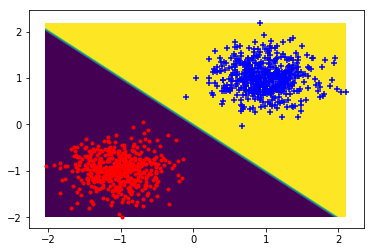

In [162]:
plot_frontiere(xgentest, predictRegLog, step=50)
plot_data(xgentest,ygentest)
plt.show()

De même, le classifieur de régression logistique fournit également une frontière qui sépare bien pour le jeu de données artificielles 0, les nuages de points et donc les différentes classes de notre base de données.

Des valeurs fortes de $f_w$ en $x$ correspondent à une prédiction d'appartenance de $x$ à la classe de signe $+1$ pour la classification plug-in. Et des valeurs faibles de $f_w(x)$ classifieraient $x$ dans la classe $-1$.

Pour la classification par régression logistique, des valeurs faibles de $f_w(x)$ impliquent des valeurs faibles de $\sigma(f_w(x)) = \frac{1}{1+e^{-f_w(x)}}$ et donc si on compare $f_w(x)$ à $0$, cela revient à comparer $\sigma(f_w(x))$ par rapport à $\frac{1}{2}$. C'est donc la même signification pour les deux classifications, vu que des valeurs trops faibles pour l'un ou l'autre fournit un signe négatif pour le prédicteur et de grandes valeurs assurent que le prédicteur renvoie un signe positif.

Histogramme des classes pour la classification plug-in : 


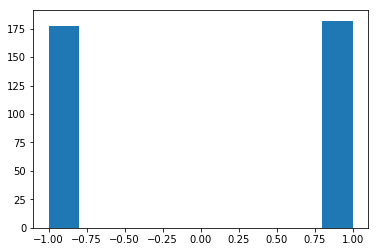

Histogramme des classes pour laclassification en régression logistique : 


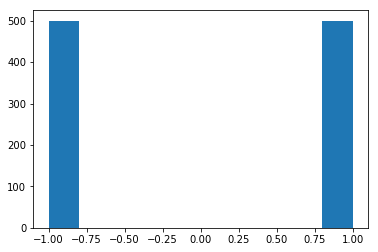

In [163]:
#Test du score d'apprentissage sur les données artificielles :
cl_plug = predictMSE(xgentest)
cl_rl = predictRegLog(xgentest)

print('Histogramme des classes pour la classification plug-in : ')
plt.hist(cl_plugin)
plt.show()
print('Histogramme des classes pour la'+\
      'classification en régression logistique : ')
plt.hist(cl_rl)
plt.show()

On remarque que sur les données artificielles, la classification plug-in reste meilleure que la régression logistique qui elle fournit une prédiction de $50\%$ de succès approximativement, ce qui n'est pas très probant.

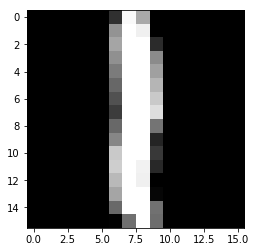

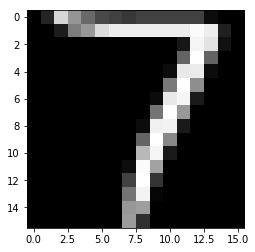

Histogramme des classes pour la classification plug-in : 


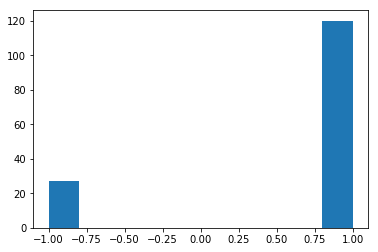

Histogramme des classes pour la classification en régression logistique : 


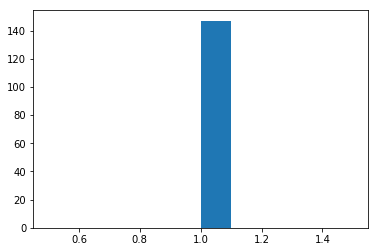

Score de 7 dans la classification binaire :
Plug-in :
0.8163265306122456
Régression logistique :
1.0000000000000009


In [166]:
# Test sur les données réelles
# Dans cette section, je modifie data et label en haut, 
#dans le bloc concernant la MSE et la RegLog. 
#En mettant bien les données réelles et en confrontant 7 et 1
#puis 0 et 6 et enfin 0 contre tous les labels.

# Question 3.6

# Score des 2 classifieurs :
def scorePrediction(cl, label):
    cl = list(cl)
    d = dict([(x, 0) for x in cl])
    for x in cl:
        d[x] += 1./len(cl)
    return d[label]

def matrixTrain(w):
    res = w.reshape((16, 16))
    return res

# Confrontation de 1 et 7:
def results():
    show_usps(xtrain[0])
    plt.show()

    show_usps(xtest[0])
    plt.show()

    cl_plugin = predictMSE(xtest)
    cl_rl = predictRegLog(xtest)
    print('Histogramme des classes pour la classification plug-in : ')
    plt.hist(cl_plugin)
    plt.show()
    print('Histogramme des classes pour la classification en régression logistique : ')
    plt.hist(cl_rl)
    plt.show()

    print('Score de 7 dans la classification binaire :')
    print('Plug-in :')
    print(scorePrediction(cl_plugin, 1))
    print('Régression logistique :')
    print(scorePrediction(cl_rl, 1))

results()

En confrontant les chiffres $1$ et $7$, on obtient un score de $81\%$ pour la classification plug-in qui montre une bonne prédiction sur les données apprises.
Pour la régression logistique, l'apprentissage fournit un résultat de $100\%$. Cela montre à quel point le modèle régression logistique permet l'explication d'un phénomène binaire par un apprentissage de données.

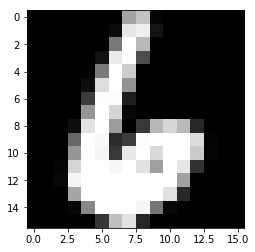

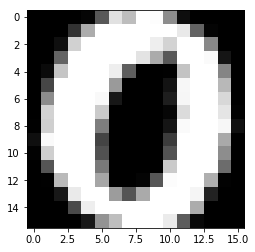

Histogramme des classes pour la classification plug-in : 


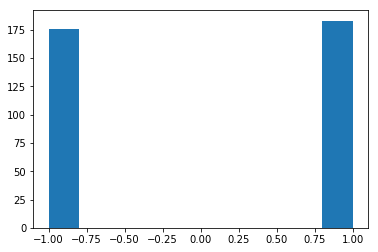

Histogramme des classes pour la classification en régression logistique : 


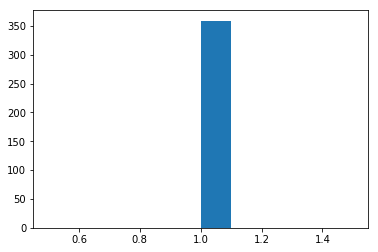

Score de 7 dans la classification binaire :
Plug-in :
0.5097493036211715
Régression logistique :
0.9999999999999942


In [169]:
# Confrontation de 0 et 6 : 
# On rechange les labels dans xtrain, ytrain, xtest et ytest

results()



Sur cet exemple de confrontation de chiffres pouvant parfois être très similaires dans l'écriture, on obtient un score assez faible pour la classification plug-in d'environ $51\%$ contre une régression logistique bien plus forte en prédiction.

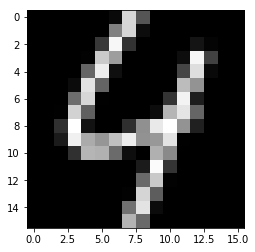

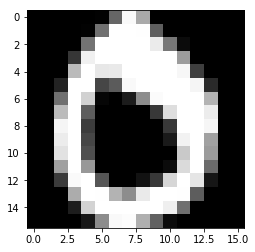

Histogramme des classes pour la classification plug-in : 


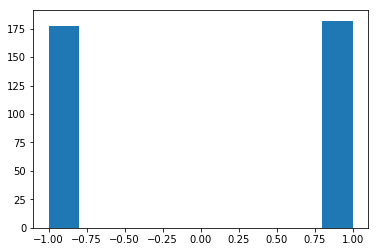

Histogramme des classes pour la classification en régression logistique : 


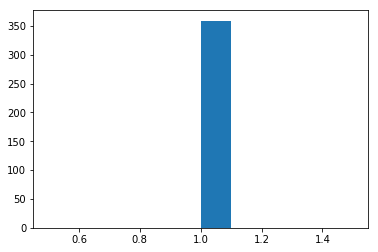

Score de 7 dans la classification binaire :
Plug-in :
0.5069637883008373
Régression logistique :
0.9999999999999942


In [172]:
# Confrontation de 0 et {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} : 
# On rechange les labels dans xtrain, ytrain, xtest et ytest

results()

In [181]:
# Affichage du vecteur d'apprentissage en matrice : (Confrontation de 1 et 7)

a, b, c = optimize(mse, grad_mse, np.array([0]+\
                                           [1]*data.shape[1]), 0.0001, 500)
print("Pour la classification plug-in, le vecteur d'apprentissage w est : ")
print(np.round(matrixTrain(a[-1][1:]), 2))

Pour la classification plug-in, le vecteur d'apprentissage w est : 
[[ 0.97  0.86  0.78  0.7   0.61  0.54  0.37  0.11  0.17  0.4   0.44  0.44
   0.5   0.64  0.84  0.97]
 [ 0.91  0.71  0.53  0.33  0.18  0.06 -0.19 -0.46 -0.49 -0.23 -0.01  0.02
   0.1   0.29  0.59  0.88]
 [ 0.89  0.68  0.45  0.23  0.09  0.05 -0.23 -0.44 -0.42 -0.19  0.09  0.06
   0.03  0.17  0.45  0.8 ]
 [ 0.91  0.75  0.53  0.33  0.26  0.28  0.05 -0.11 -0.06  0.15  0.39  0.24
   0.07  0.17  0.46  0.83]
 [ 0.93  0.79  0.64  0.52  0.55  0.61  0.35  0.2   0.23  0.37  0.49  0.25
   0.08  0.24  0.56  0.89]
 [ 0.94  0.83  0.73  0.68  0.74  0.77  0.47  0.34  0.38  0.45  0.47  0.16
   0.08  0.37  0.71  0.95]
 [ 0.96  0.89  0.83  0.83  0.86  0.83  0.51  0.38  0.39  0.37  0.27  0.04
   0.17  0.53  0.85  0.98]
 [ 0.99  0.95  0.93  0.92  0.92  0.85  0.51  0.38  0.33  0.19  0.04  0.01
   0.34  0.73  0.94  0.99]
 [ 1.    0.98  0.95  0.95  0.95  0.85  0.49  0.35  0.2  -0.06 -0.1   0.14
   0.58  0.87  0.97  1.  ]
 [ 1.    1.    0.98  0.

#### Conclusion



Les classifieurs bayésiens naifs restent une méthode très utile pour effectuer le tri des données et pouvoir différentier entre certaines classes d'apprentissage. On a pu voir durant ce TP, que les classifieurs peuvent renvoyer des scores d'apprentissage très élevé et donc se révéler assez utile en terme de prédiction des données une fois ces dernières apprises correctement.

Toutefois, je ne comprends pas pourquoi mon classifieur de régression logistique pose problème et fournit un score très élevé.